In [12]:
import torch
from torchvision import transforms as T
from PIL import Image

In [13]:
# Load the model from file
model = torch.load('model/model_resnet.pth', weights_only=False, map_location=torch.device('cpu'))

In [14]:
# Choose the device: CUDA if available, otherwise CPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Set the model to evaluation mode
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [15]:
def get_transform():
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    return T.Compose(transforms)


In [16]:
# Load a test image and apply transforms
image_path = './data/img.png'
image = Image.open(image_path).convert("RGB")
transform = get_transform()
img_tensor = transform(image)

# For detection models, the model expects a list of images
img_tensor = img_tensor.to(device)

In [17]:
with torch.no_grad():
    predictions = model([img_tensor])

threshold = 0.5
pred = predictions[0]  # since we passed one image
filtered_boxes = pred['boxes'][pred['scores'] > threshold]
filtered_labels = pred['labels'][pred['scores'] > threshold]
filtered_scores = pred['scores'][pred['scores'] > threshold]

print("Filtered Boxes:", filtered_boxes)
print("Filtered Labels:", filtered_labels)
print("Filtered Scores:", filtered_scores)

Filtered Boxes: tensor([[2.7231e+02, 1.0849e+02, 3.7441e+02, 1.8719e+02],
        [2.4948e+02, 3.8494e+02, 4.1661e+02, 5.2000e+02],
        [1.9339e+01, 5.5278e+01, 8.8680e+01, 1.1264e+02],
        [6.0697e+02, 8.3811e+01, 6.9775e+02, 1.4274e+02],
        [4.7433e+02, 1.9019e+02, 6.2534e+02, 3.0442e+02],
        [0.0000e+00, 4.3279e+02, 3.1791e+02, 6.7863e+02],
        [4.1296e+02, 3.5513e+01, 4.7624e+02, 7.6144e+01],
        [7.1241e+02, 9.4753e+01, 7.9424e+02, 1.4440e+02],
        [5.1974e+02, 4.9833e+01, 5.8115e+02, 8.7270e+01],
        [3.1206e+02, 3.9241e+01, 3.6962e+02, 7.4201e+01],
        [1.7200e+02, 7.0126e+01, 2.4741e+02, 1.2018e+02],
        [4.2157e+02, 2.9512e+02, 5.8299e+02, 4.2918e+02],
        [8.5014e+02, 1.8938e+02, 9.8647e+02, 2.7104e+02],
        [4.1580e-01, 2.2091e+01, 2.8049e+01, 7.0593e+01],
        [4.7416e+02, 9.4522e+00, 5.3401e+02, 5.1257e+01],
        [5.2002e+01, 1.0828e+02, 2.5338e+02, 3.3523e+02],
        [2.3997e+02, 1.9626e+00, 2.8293e+02, 2.0236e+01]

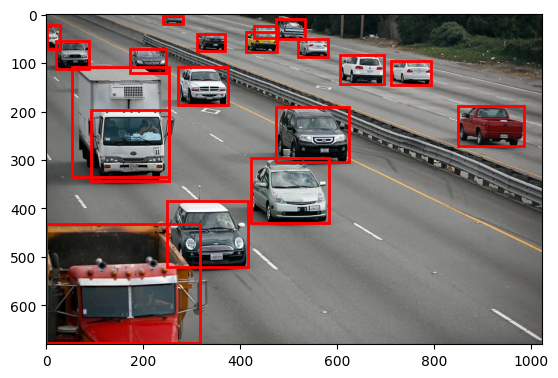

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
# Convert image to numpy array for plotting
img_np = np.array(image)

fig, ax = plt.subplots(1)
ax.imshow(img_np)

# Draw each filtered bounding box
for box in filtered_boxes:
    x_min, y_min, x_max, y_max = box.cpu().numpy()
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()
